# Read mean from all CSVs -> plot line -> fit curve

## Importing packages and reading files

In [23]:
import os
import pandas as pd
import re

In [24]:
folder = input("such as: Eng_US")
if folder.endswith('_US'):
    Header = 'vallecula_x	vallecula_y	vallecula_p	tongueRoot1_x	tongueRoot1_y	tongueRoot1_p	tongueRoot2_x	tongueRoot2_y	tongueRoot2_p	tongueBody1_x	tongueBody1_y	tongueBody1_p	tongueBody2_x	tongueBody2_y	tongueBody2_p	tongueDorsum1_x	tongueDorsum1_y	tongueDorsum1_p	tongueDorsum2_x	tongueDorsum2_y	tongueDorsum2_p	tongueBlade1_x	tongueBlade1_y	tongueBlade1_p	tongueBlade2_x	tongueBlade2_y	tongueBlade2_p	tongueTip1_x	tongueTip1_y	tongueTip1_p	tongueTip2_x	tongueTip2_y	tongueTip2_p	hyoid_x	hyoid_y	hyoid_p	mandible_x	mandible_y	mandible_p	shortTendon_x	shortTendon_y	shortTendon_p'.split('\t')
else:
    Header = 'leftLip_x	leftLip_y	leftLip_p	rightLip_x	rightLip_y	rightLip_p	topleftinner_x	topleftinner_y	topleftinner_p	bottomleftinner_x	bottomleftinner_y	bottomleftinner_p	topmidinner_x	topmidinner_y	topmidinner_p	bottommidinner_x	bottommidinner_y	bottommidinner_p	toprightinner_x	toprightinner_y	toprightinner_p	bottomrightinner_x	bottomrightinner_y	bottomrightinner_p'.split('\t')

In [25]:
directory = "./normalized_csv/" + folder + '/interpolated/'
csv_ls = os.listdir(directory)

## Collecting means

In [26]:
raw_means = pd.DataFrame()
for i in csv_ls:
    file = re.search('(Eng)?(Mand)?(_US)?\d{3}(_\d)?', i)[0]
    # print(file)
    i_full = directory + i
    csv = pd.read_csv(i_full, sep=',', skiprows=[0,1,2], header=None)
    New_Header = [file] + Header
    csv = csv.set_axis(New_Header, axis=1)

    mean_of_csv = pd.DataFrame(csv[[i for i in Header if i.endswith(("_x", "_y"))]].mean()).T
    mean_of_csv = mean_of_csv.rename(index = {0:file})
    raw_means = pd.concat([raw_means, mean_of_csv])

In [27]:
raw_means

,leftLip_x,leftLip_y,rightLip_x,rightLip_y,topleftinner_x,topleftinner_y,bottomleftinner_x,bottomleftinner_y,topmidinner_x,topmidinner_y,bottommidinner_x,bottommidinner_y,toprightinner_x,toprightinner_y,bottomrightinner_x,bottomrightinner_y
Eng001,52.944021,101.274350,253.338114,86.274355,92.646492,84.958852,93.995974,93.188324,144.014941,78.463004,145.697917,92.347742,198.955255,84.544101,199.212759,89.692456
Eng002,53.751087,99.568054,245.900383,84.454459,92.230230,83.616130,93.960964,94.403129,141.719138,75.600338,143.302608,93.461377,195.570131,78.688373,194.975592,89.301287
Eng003,53.355310,100.821540,245.893411,85.169435,92.495950,82.340866,93.496740,92.190001,141.033281,73.950415,143.457292,89.300786,195.031190,79.660332,194.865901,85.182457
Eng004,48.738657,103.165391,233.349303,84.322673,87.927607,85.971027,88.141732,91.764142,138.976690,79.733410,140.616877,90.564122,194.038738,85.185004,193.854879,88.982508
Eng005,48.747248,100.710353,251.635959,84.631045,89.321002,84.133810,90.538423,91.422171,141.346755,76.367191,143.818022,90.720669,200.408566,83.667472,199.940687,87.884211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Eng482,49.263559,103.621344,260.320418,90.780817,95.899981,83.603224,96.798792,103.198953,147.971781,79.209737,147.496055,101.309292,205.268403,82.236657,203.461664,98.429889
Eng483,49.008268,103.960189,259.811326,89.785596,96.017008,83.116104,96.489892,103.460949,147.804384,78.652417,147.529636,102.950892,205.172542,80.922700,203.558246,98.247993
Eng484,50.518266,105.015201,257.186784,92.634703,95.359256,86.852398,96.267914,101.566528,148.416281,79.225467,147.393684,100.626165,203.003274,85.223435,201.963966,97.853442
Eng485,48.030154,96.884172,264.755133,81.752550,97.536628,76.675980,96.564147,99.611357,150.898871,72.885773,150.986288,98.996188,210.342926,72.476378,209.539258,93.803360


In [28]:
df_ls = []
for i in csv_ls:
    i_full = directory + i
    csv = pd.read_csv(i_full, sep=',', skiprows=[0,1,2], header=None)
    df_ls.append(csv)

entire_csv = pd.concat(df_ls)
avg_of_all = entire_csv.mean()
std_of_all = entire_csv.std(axis=0)

In [29]:
avg_of_all = [avg_of_all[i] for i in range(len(avg_of_all)) if i%3!=0]
std_of_all = [std_of_all[i] for i in range(len(std_of_all)) if i%3!=0]

In [30]:
with open('./metadata/'+folder+'.txt', 'w') as outfile:
    outfile.write('mean: ' + ','.join(str(i) for i in avg_of_all))
    outfile.write('\n')
    outfile.write('std: ' + ','.join(str(i) for i in std_of_all))


## Fitting to curve

In [31]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

t = np.linspace(0, len(raw_means), len(raw_means))
xn = raw_means.iloc[:,0]

b, a = signal.butter(3, 0.05)
y = signal.filtfilt(b, a, xn)

In [32]:
xn.shape

(488,)

<function matplotlib.pyplot.show(close=None, block=None)>

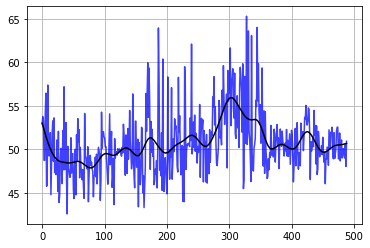

In [33]:
plt.figure
plt.plot(t, xn, 'b', alpha=0.75)
plt.plot(t, y, 'k')
plt.grid(True)
plt.show

In [34]:
a = xn-y
len(a)

488

### As a function:

In [35]:
def fit_curve(bodypart):
    '''
    bodypart: str, iterated by column names
    '''

    t = np.linspace(0, len(raw_means), len(raw_means))
    xn = raw_means[bodypart]

    b, a = signal.butter(3, 0.05)
    y = signal.filtfilt(b, a, xn)
    
    plt.cla()
    plt.figure
    plt.plot(t, xn, 'b', alpha=0.75)
    plt.plot(t, y, 'k')
    plt.grid(True)
    plt.savefig('./plots/' + folder + '/' + bodypart + '.svg')
    plt.close
       
    return pd.DataFrame(y)

In [36]:
folder

'Eng'

## Fitted means

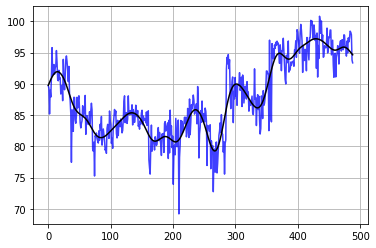

In [37]:
fitted_means = pd.DataFrame()

for col in raw_means.columns:
    fitted_means = pd.concat([fitted_means, fit_curve(col)], axis=1, ignore_index=True)

In [38]:
fitted_means.index = raw_means.index
fitted_means.set_axis([i for i in Header if i.endswith(("_x", "_y"))], axis=1)

,leftLip_x,leftLip_y,rightLip_x,rightLip_y,topleftinner_x,topleftinner_y,bottomleftinner_x,bottomleftinner_y,topmidinner_x,topmidinner_y,bottommidinner_x,bottommidinner_y,toprightinner_x,toprightinner_y,bottomrightinner_x,bottomrightinner_y
Eng001,53.005558,101.432216,252.801175,86.357790,92.588687,84.838994,93.959758,93.319967,143.775713,78.064954,145.435480,92.549343,198.484282,84.335152,198.785430,89.774333
Eng002,52.747876,101.434104,250.636883,86.356293,92.323298,85.162106,93.619663,93.540458,143.309753,78.525426,144.956938,92.777648,197.842095,84.518380,198.019900,90.017445
Eng003,52.491061,101.418446,248.426383,86.328866,92.061145,85.478667,93.283176,93.755531,142.852042,78.973798,144.484286,93.003785,197.206801,84.697940,197.263335,90.254915
Eng004,52.236629,101.385066,246.198499,86.276585,91.804144,85.785394,92.953127,93.962873,142.407726,79.406663,144.023387,93.225693,196.587478,84.872809,196.525714,90.484646
Eng005,51.985994,101.333877,243.981589,86.200678,91.554117,86.079187,92.632196,94.160145,141.981682,79.820952,143.579860,93.441138,195.992908,85.042026,195.816619,90.704479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Eng482,50.597462,101.352630,261.845674,88.968581,97.192932,80.011349,98.053945,100.476336,149.313150,77.664847,149.533399,99.082746,206.992564,77.763144,204.924585,95.144870
Eng483,50.617594,101.172843,261.886806,88.912544,97.206209,79.765900,98.075721,100.333127,149.350331,77.527790,149.578298,98.937450,207.021084,77.592995,204.924474,95.018137
Eng484,50.639172,100.996232,261.924529,88.854650,97.221767,79.523322,98.099200,100.191569,149.388180,77.387292,149.623831,98.792924,207.049827,77.419728,204.924734,94.891561
Eng485,50.661496,100.826844,261.958568,88.796894,97.238796,79.289389,98.123514,100.055041,149.425565,77.247512,149.668679,98.652789,207.078018,77.248516,204.925256,94.768389


In [39]:
fitted_means.to_csv('./' + folder + '_each_mean.csv', header = [i for i in Header if i.endswith(("_x", "_y"))])

In [40]:
len([i for i in Header if i.endswith(("_x", "_y"))])

16

In [41]:
for i in csv_ls:
    file = re.search('(Eng)?(Mand)?(_US)?\d{3}(_\d)?', i)[0]
    i_full = directory + i
    csv = pd.read_csv(i_full, sep=',', skiprows=[0,1,2], header=None)
    New_Header = [file] + Header
    csv = csv.set_axis(New_Header, axis=1)

    original_csv = pd.DataFrame(csv[[j for j in Header if j.endswith(("_x", "_y"))]])
    
    fitted_csv = original_csv.sub(list(fitted_means.loc[file]), axis = 'columns')
    
    fitted_csv = (fitted_csv - avg_of_all) / std_of_all

    fitted_csv.to_csv('./normalized_csv/' + folder + '/interpolated_z/' + file + '_interpolated_norm_z.csv', header = [i for i in Header if i.endswith(("_x", "_y"))])

    

Saving to `folder`_normalized.csv